In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('top-5000-youtube-channels.csv')
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [4]:
# checking null values
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [5]:
data.shape

(5000, 6)

In [6]:
# replaceing irrelevant values to null value
data.replace('--',np.nan,inplace=True,regex=True)

In [7]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [8]:
# droping null values
data.dropna(inplace=True)
data.shape

(4610, 6)

## Data Preprocessing

In [9]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [10]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [11]:
# Preprocessing Rank Column
data['Rank'] = data['Rank'].apply(lambda x:(str(x).replace(',','')[:-2]))
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [12]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   object
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   object
 4   Subscribers    4610 non-null   object
 5   Video views    4610 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 252.1+ KB


In [14]:
# changing columns with integar values to Dtype int64
data[['Rank','Video Uploads', 'Subscribers','Video views']]=\
data[['Rank','Video Uploads', 'Subscribers','Video views']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int64 
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   int64 
 4   Subscribers    4610 non-null   int64 
 5   Video views    4610 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.1+ KB


In [15]:
# maping grade variables with numerical variables
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [16]:
# removing unnecessary space from variable
data['Grade'] = data['Grade'].str[:-1]

In [17]:
data['Grade_Num'] = data['Grade'].map({'A++':1, 'A+':2, 'A':3, 'A-':4, 'B+':5})
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_Num
0,1,A++,Zee TV,82757,18752951,20869786591,1
1,2,A++,T-Series,12661,61196302,47548839843,1
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082,1
3,4,A++,SET India,27323,31180559,22675948293,1
4,5,A++,WWE,36756,32852346,26273668433,1


## Data Analysis

In [18]:
# Find Average Views For Each Channel
pd.options.display.float_format='{:.2f}'.format
data['Average_views'] = data['Video views'] / data['Video Uploads']
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_Num,Average_views
0,1,A++,Zee TV,82757,18752951,20869786591,1,252181.53
1,2,A++,T-Series,12661,61196302,47548839843,1,3755535.89
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082,1,26255509.60
3,4,A++,SET India,27323,31180559,22675948293,1,829921.62
4,5,A++,WWE,36756,32852346,26273668433,1,714813.05


In [19]:
# Top 10 channels with highest average views
data.sort_values(by='Average_views',ascending=False)[:10]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_Num,Average_views
628,629,A,cocoz toon,1,2162992,333012122,3,333012122.00
314,315,A,icanrockyourworld,8,3891968,2420286079,3,302535759.88
613,614,A,AdeleVEVO,31,16270830,7414111263,3,239164879.45
389,390,A,Bad Bunny,11,12685253,2612504875,3,237500443.18
1120,1121,A-,Danny Ocean,8,2861917,1690503137,4,211312892.12
1264,1265,A-,CrazyFrogVEVO,12,4585990,2477475081,4,206456256.75
84,85,A,Galinha Pintadinha,47,13312085,9570884138,3,203635832.72
246,247,A,MTZ Manuel Turizo,9,3531337,1748814742,3,194312749.11
304,305,A,TaylorSwiftVEVO,86,28133287,15476966737,3,179964729.50
13,14,A+,Ozuna,50,18824912,8727783225,2,174555664.50


In [20]:
# Top Five Channels With Maximum Number of Video Uploads
data.sort_values(by='Video Uploads',ascending=False)[:5]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_Num,Average_views
3453,3454,B+,AP Archive,422326,746325,548619569,5,1299.04
1149,1150,A-,YTN NEWS,355996,820108,1640347646,4,4607.77
2223,2224,B+,SBS Drama,335521,1418619,1565758044,5,4666.65
323,324,A,GMA News,269065,2599175,2786949164,3,10357.90
2956,2957,B+,MLB,267649,1434206,1329206392,5,4966.23


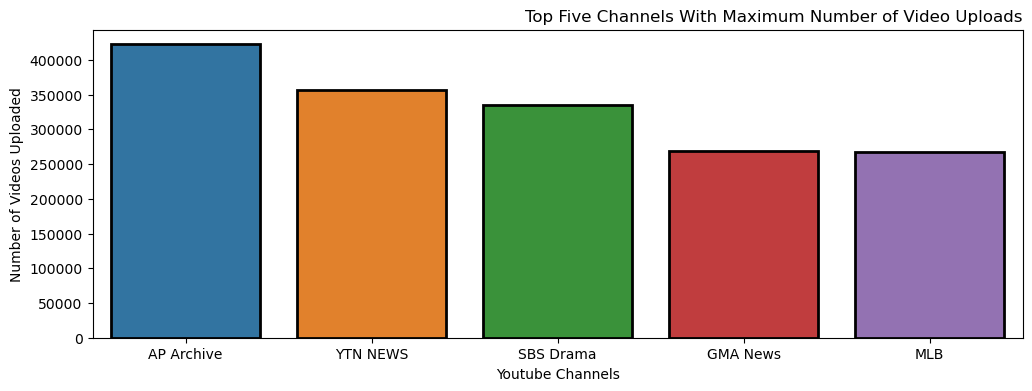

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(data.sort_values(by='Video Uploads',ascending=False)[:5]['Channel name'],\
           data.sort_values(by='Video Uploads',ascending=False)[:5]['Video Uploads'],edgecolor='k',linewidth=2)
plt.xlabel('Youtube Channels')
plt.ylabel('Number of Videos Uploaded')
plt.title('Top Five Channels With Maximum Number of Video Uploads',loc='right')
plt.show()

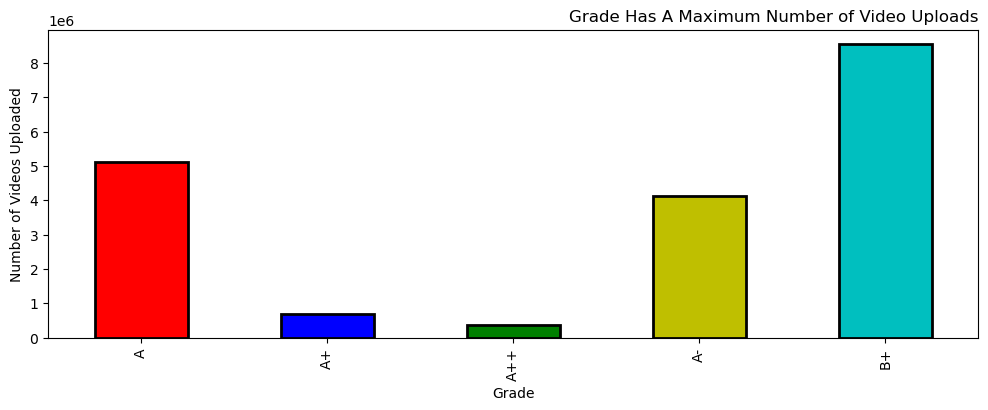

Grade B+ has Maximum number of Video Uploads


In [22]:
# Which Grade Has A Maximum Number of Video Uploads?
plt.figure(figsize=(12,4))
data.groupby('Grade')['Video Uploads'].sum().plot(kind='bar',edgecolor='k',linewidth=2,color=['r','b','g','y','c'])
plt.xlabel('Grade')
plt.ylabel('Number of Videos Uploaded')
plt.title('Grade Has A Maximum Number of Video Uploads',loc='right')
plt.show()
print('Grade B+ has Maximum number of Video Uploads')

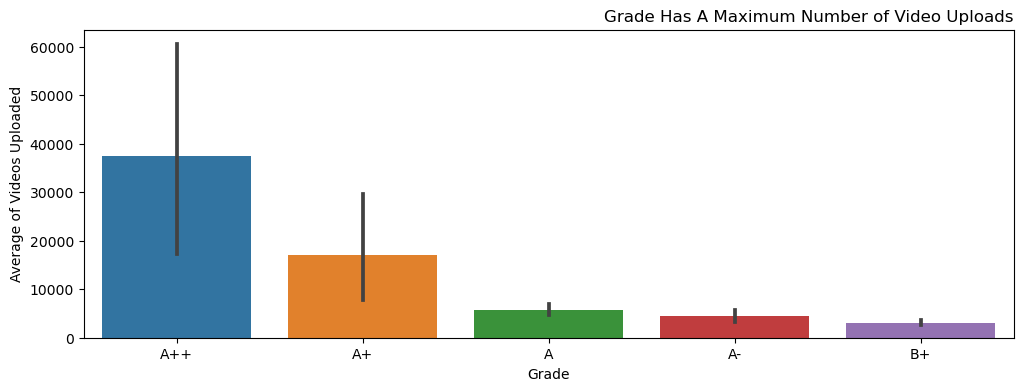

In [23]:
# Average video uploads as per Grade
plt.figure(figsize=(12,4))
sns.barplot(data['Grade'],data['Video Uploads'])
plt.xlabel('Grade')
plt.ylabel('Average of Videos Uploaded')
plt.title('Grade Has A Maximum Number of Video Uploads',loc='right')
plt.show()

In [24]:
# Which Grade Has The Highest Average Views?
data.sort_values(by='Average_views',ascending=False)[:1][['Grade','Channel name','Average_views']]

,Grade,Channel name,Average_views
628,A,cocoz toon,333012122.00


In [25]:
# Which Grade Has The Highest Number of Subscribers? 
data.sort_values(by='Subscribers',ascending=False)[:1][['Grade','Channel name','Subscribers']]

,Grade,Channel name,Subscribers
1470,A-,PewDiePie,65995310


In [26]:
# Which Grade Has The Highest Video Views? 
data.sort_values(by='Video views',ascending=False)[:1][['Grade','Channel name','Video views']]

,Grade,Channel name,Video views
1,A++,T-Series,47548839843


In [27]:
# Correlation Matrix
print('Subscriber values are highly correlated with Video views with 79%')
data.corr()

Subscriber values are highly correlated with Video views with 79%


,Rank,Video Uploads,Subscribers,Video views,Grade_Num,Average_views
Rank,1.00,-0.07,-0.38,-0.40,0.87,-0.15
Video Uploads,-0.07,1.00,0.01,0.09,-0.09,-0.06
Subscribers,-0.38,0.01,1.00,0.79,-0.43,0.29
Video views,-0.40,0.09,0.79,1.00,-0.48,0.29
Grade_Num,0.87,-0.09,-0.43,-0.48,1.00,-0.16
Average_views,-0.15,-0.06,0.29,0.29,-0.16,1.00


<AxesSubplot:>

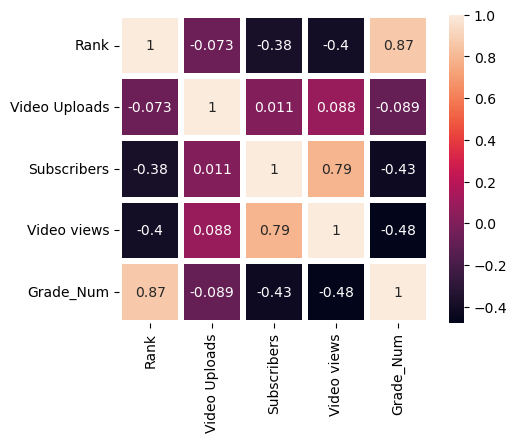

In [28]:
int_var = data.select_dtypes('int64')
plt.figure(figsize=(5,4))
sns.heatmap(int_var.corr(),annot=True,linewidth=3)

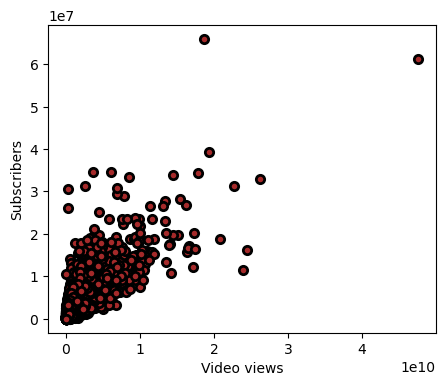

In [29]:
# Visual Correlation Between Subscribers and Video views 
plt.figure(figsize=(5,4))
sns.scatterplot(data['Video views'],data['Subscribers'],color='brown',edgecolor='k',linewidth=2)
plt.show()

In [30]:
# Top 10 channels with highest Subscribers
data.sort_values(by='Subscribers',ascending=False)[:10][['Channel name','Subscribers']]

,Channel name,Subscribers
1470,PewDiePie,65995310
1,T-Series,61196302
11,Canal KondZilla,39409726
174,Dude Perfect,34489432
3222,HolaSoyGerman.,34480357
435,JustinBieberVEVO,34284457
63,Ed Sheeran,33961184
10,5-Minute Crafts,33492951
4,WWE,32852346
1942,whinderssonnunes,31332790


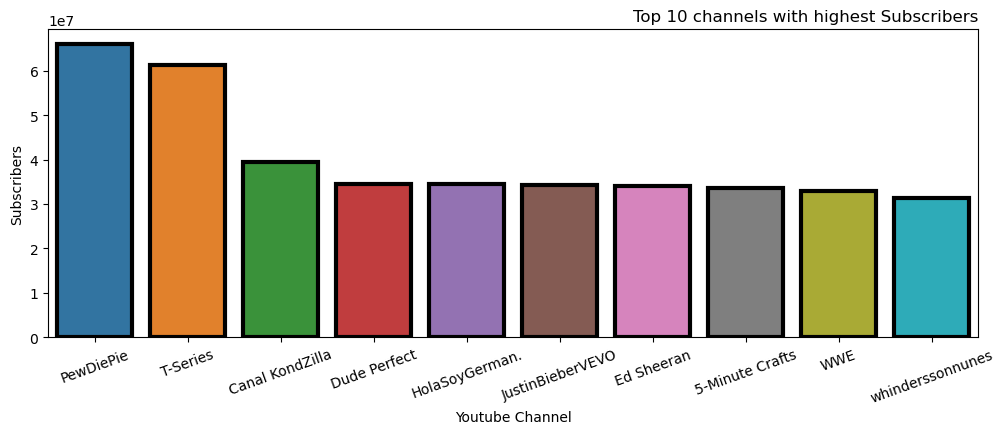

In [31]:
# Top 10 channels with highest Subscribers
plt.figure(figsize=(12,4))
sns.barplot(list(data.sort_values(by='Subscribers',ascending=False)[:10]['Channel name']),\
           list(data.sort_values(by='Subscribers',ascending=False)[:10]['Subscribers']),edgecolor='k',linewidth=3)
plt.xlabel('Youtube Channel')
plt.ylabel('Subscribers')
plt.title('Top 10 channels with highest Subscribers',loc='right')
plt.xticks(rotation=20)
plt.show()

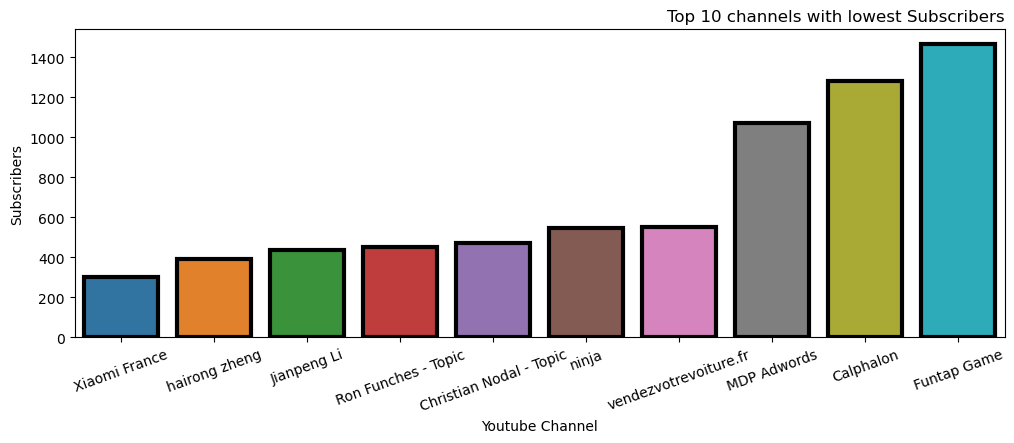

In [32]:
# Top 10 channels with lowest Subscribers
plt.figure(figsize=(12,4))
sns.barplot(list(data.sort_values(by='Subscribers',ascending=True)[:10]['Channel name']),\
           list(data.sort_values(by='Subscribers',ascending=True)[:10]['Subscribers']),edgecolor='k',linewidth=3)
plt.xlabel('Youtube Channel')
plt.ylabel('Subscribers')
plt.title('Top 10 channels with lowest Subscribers',loc='right')
plt.xticks(rotation=20)
plt.show()


In [33]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_Num,Average_views
0,1,A++,Zee TV,82757,18752951,20869786591,1,252181.53
1,2,A++,T-Series,12661,61196302,47548839843,1,3755535.89
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082,1,26255509.60
3,4,A++,SET India,27323,31180559,22675948293,1,829921.62
4,5,A++,WWE,36756,32852346,26273668433,1,714813.05


In [34]:
# Number of channels as per grade
for i,j in zip(data.groupby('Grade').size(),data.groupby('Grade').size().keys()):
    print(f'Grade {j} has total {i} number of channels')

Grade A has total 897 number of channels
Grade A+ has total 40 number of channels
Grade A++ has total 10 number of channels
Grade A- has total 941 number of channels
Grade B+ has total 2722 number of channels
